In [29]:
import requests
import io
import cv2 as cv
from pyzbar.pyzbar import decode
from PIL import Image
import matplotlib.pyplot as plt

In [30]:
url="https://chart.googleapis.com/chart?cht=qr&chl=hi%20learncodeonline%0A&chs=180x180&choe=UTF-8&chld=L|2"

In [31]:
img=Image.open(io.BytesIO(requests.get(url,stream=True).content)).convert("RGB")


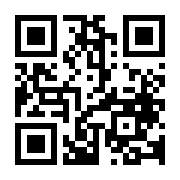

In [32]:
img

In [15]:
decode(img)[0].data

b'hi learncodeonline'

In [ ]:
import requests
import io
import cv2 as cv
from pyzbar.pyzbar import decode
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
def main():
    camera=cv.VideoCapture(0)
    ret=camera.set(3,320)
    while True:
        _,frame=camera.read()
        frame_g=cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
        data=decode(Image.fromarray(frame_g))
         
        for d in data:
             x,y,w,h=d.rect
             cv.rectangle(frame,(x,y),(x+w,y+h),(255,240,90),2)
             tx,ty=cv.getTextSize(str(d.data.decode("utf-8")),cv.FONT_HERSHEY_COMPLEX,fontScale=1.3,thickness=1)[0]
             cv.rectangle(frame,(x,y-ty),(x+tx,y+10),(255,20,90),-1)

             cv.putText(frame,str(d.data.decode("utf-8")),(x,y),cv.FONT_HERSHEY_COMPLEX,0.7,(255,255,255),1,cv.LINE_AA)
        cv.imshow("scanner",frame)

        key=cv.waitKey(10)
        if key & 0xff == ord("q"):
            cv.destroyAllWindows()
            camera.release()
            break
                    
main()                  